# Introduction

These are my notes on statistics and quantitative methods for analysis in the social sciences.

## Why use statistics?

As social scientists and researchers we want to answer questions about the social world.
At its most simplistic (and I completely acknowledge that I'm massively generalising here), we usually seek to describe the world or quantify the world.
For these tasks we use qualitative methods and quantitative methods respectively.

To quantify the world we might want to know things like, "how many people have been a victim of crime?", "how many people have mental health problems?", or "how many people have social science degrees?".

Sometimes we have complete (or near--complete) data about everybody in a population.
For example, in the UK the decennial (i.e. every ten years) census is a count of everybody, including certain characteristics such as health, education, and employment.
In this case the population is everybody in the UK.

More often than not it is impractical to ask everybody our questions.
Usually the cost and time required to carry out such a survey prohibit asking every single person what we want to know, but also very few people would answer everything that they were asked (the only reason everybody responds to the census is because [it's a crime not to complete the census](https://en.wikipedia.org/wiki/Census_in_the_United_Kingdom#Criminal_law) and [people have been prosecuted for not completing it](https://www.theguardian.com/uk/2012/jan/27/120-convicted-census-forms-2011)).
Instead we take a *sample* of the population, and *infer*, from our sample, what the population is like.

For example, we might ask a random sample of 1,000 people what their favourite hot drink is.
It's not that we want to know what this 1,000 people think more than any other 1,000 people.
Instead, they are our *sample* and, based on their responses, we can *infer* what the most popular hot drink is for the *population*.
In the UK, the [most popular hot drink is tea](https://www.statista.com/statistics/697383/favorite-hot-drinks-united-kingdom-uk/), but everybody knows it should be coffee.

![Coffee is clearly superior to tea](../images/coffee.jpg)

Obtaining knowledge about a *population* by *inferring* from a *sample* is the cornerstone of quantitative social science research, and uses many statistical techniques to be able to do this.
The good news is the most difficult challenge is often deciding which technique to use; using the technique is often like following a recipe.


## Packages

I use `python3` to process and analyse the data, and a number of packages install through anaconda.


In [19]:
import os
import requests
import shutil
import pandas as pd
import matplotlib.pyplot as plt

## Data sources

These tutorials use a number of teaching data sets available from the [UK Data Service](https://www.ukdataservice.ac.uk/) under terms of the [Open Government License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/):

> Office for National Statistics, University of Manchester, Cathie Marsh Institute for Social Research (CMIST), UK Data Service, 2016, Living Costs and Food Survey, 2013: Unrestricted Access Teaching Dataset, [data collection], Office for National Statistics, 2nd Edition, Office for National Statistics, [original data producer(s)]. Accessed 1 October 2018. SN: 7932, http://doi.org/10.5255/UKDA-SN-7932-2. Contains public sector information licensed under the Open Government Licence v2.0


In [8]:
os.makedirs("../data/external", exist_ok=True)

if not os.path.isfile("../data/external.food.zip"):
    food = "https://beta.ukdataservice.ac.uk/Umbraco/Surface/Discover/GetDownload?studyNumber=7932&fileName=7932tab_818dcb297393b2557b07f05acaae70b9.zip"
    food = requests.get(food)
    food = food.content
    outfile = open("../data/external/food.zip", "wb")
    outfile.write(food)

shutil.unpack_archive("../data/external/food.zip", extract_dir = "../data/external/")

In [11]:
food = pd.read_csv(
    "../data/external/UKDA-7932-tab/tab/lcfs_2013_teaching.tab",
    sep = "\t"
)

# Check it's loaded correctly
food.head()

,casenew,weighta,P550tpr,P344pr,P425r,A172,A093r,A094r,A121r,SexHRP,A049r,G018r,G019r,Gorx,weightar
0,14999,2.834724,380.695762,465.36,1,1,4,3,1,2,4,2,3,4,0.543248
1,14993,10.077947,546.413403,855.26,1,1,1,4,3,2,2,2,1,7,1.931344
2,14993,4.088676,242.189023,160.96,1,1,1,2,3,2,1,1,1,8,0.783557
3,14984,4.571760,421.382353,656.22,1,1,1,3,3,1,2,2,1,6,0.876135
4,14981,7.349617,370.405577,398.80,1,1,1,4,3,1,1,1,1,8,1.408485


# Levels of measurement

Levels of measurement describe the nature of your data point.
They are important because they determine what statistical tests you can perform on them.
The four levels of measurement are:


## Nominal

Also known as **categorical**.
These are labels such as male/female; no religion/religion.
They have no inherent order; one response is not 'better' or 'higher' than another.
As social scientists you'll find these are pretty common.


## Ordinal

Similar to nominal in that they are labels (rather than numbers), but the labels have a rank or order.
For example, a 'strongly disagree' to 'strongly agree' scale is ordinal.
Another example would be 'guilty' and 'not guilty'.


## Interval

Interval data is numerical but does not have a meaningful zero value.
The most common example often given is temperature expressed in degrees celcius.
A temperature of 20&deg;C is not twice as hot as 10&deg;C, because 0&deg;C is arbitrary rather than based on the absence of heat.

A more common example in the social sciences is date.
Years are based on an arbitrary zero (0AD); months are based on twelve months that do not have a 'zero'; days do not have a zero and reset each month.


## Ratio

Ratio data is again numerical, but differs from interval because it has a meaningful, non--arbitrary, zero.
As we saw above dates are interval, but age in years is ratio because zero years old is the lowest age you can be.

It is more common for numerical data to be ratio than interval.
Other examples include income and number of events (e.g. number of crimes in an area).


# Central tendency

Measures of central tendency is a fancy phrase for 'average'.
They are a single data point used to represent a 'typical' value from your data.
Depending on your level of measurement you can use one or more measures of central tendency.


## Mode

The most common value.
Mode is the only measure of central tendency you can provide for [nominal data](../levels-of-measurement#nominal).

For example, the variable `A121r` in our food data set is of household tenure type.
The available options are:

1. public rented (i.e. rented from a council)
2. private rented (i.e. rented from a landlord)
3. owned

A frequency (count) table of this variable shows that `owned` is the most common type of tenure:


In [12]:
food["A121r"] = food["A121r"].astype("category")
food["A121r"].cat.categories = ["public rented", "private rented", "owned"]
food["A121r"].value_counts()

owned             3466
public rented      880
private rented     798
Name: A121r, dtype: int64

## Median

The median is the 'middle' point.
It's only appropriate for ordered data (i.e. ordinal or numeric) and is calculated by arranging your data in order and selecting the mid--point.
`P344pr` is the gross normal weekly household income for each respondent (note that these have been [top--coded](https://en.wikipedia.org/wiki/Top-coded), but we can ignore this for our example).
The following are incomes for the first five respondents as an example:


In [13]:
food["P344pr"].head()

0    465.36
1    855.26
2    160.96
3    656.22
4    398.80
Name: P344pr, dtype: float64

Which looks like this when we plot it as a distribution (remember this data has been top-coded):

Text(0, 0.5, 'Frequency')

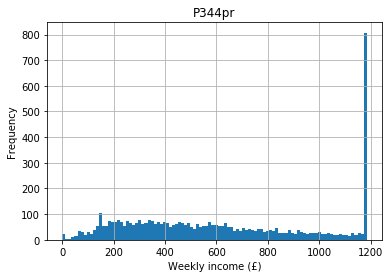

In [20]:
food.hist("P344pr", bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")